## 4.Project/homework

Choose one of the following topics and solve it:

### 4.1 **Diabetes Dataset**.

Predict whether a patient has diabetes based on the following diagnostic measurements:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Blood Pressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skinfold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- The outcome is a binary class (0 or 1)

Use MLP based titanic_model and Keras API.

### 4.2 **Titanic dataset**

Same as lab04 Classification. Use the feature engineering discussed in the project class.

Use MLP based titanic_model and Keras API.

**This homework is obligatory. Please send colab link to kwant@agh.edu.pl before 24.04.2024.**

## https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html
0. Survived Indicator
1. Passenger Class
2. Name
3. Sex
4. Age
5. Siblings Aboard
6. Parents Aboard
7. Fare paid in £s


- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat - Lifeboat (if survived)
- body - Body number (if did not survive and body was recovered)

In [46]:
!wget -nc https://raw.githubusercontent.com/MenosGrandes/AI_ML_Course/main/requirements.txt
!wget -nc https://raw.githubusercontent.com/MenosGrandes/AI_ML_Course/main/db/titanic_FR.csv

File ‘requirements.txt’ already there; not retrieving.

File ‘titanic_FR.csv’ already there; not retrieving.



In [47]:
!pip install -r requirements.txt
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
import pandas as pd
import numpy as np
import platform
import pandas as pd
import numpy as np
import warnings
import sys;
#define Seaborn color palette to use
import numpy as np
from math import ceil
from itertools import zip_longest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
import missingno as msno
import re
import tensorflow as tf
import keras
from keras import layers
from keras import ops




In [48]:
import logging
from rich.logging import RichHandler

FORMAT = "%(message)s"
logging.basicConfig(
    level="NOTSET", format=FORMAT, datefmt="[%X]", handlers=[RichHandler()]
)

logger = logging.getLogger("rich")


In [49]:
v = platform.python_version_tuple();
if float(v[1]) < 10:
    raise Exception("MUST USE Python 3.10 to use MATCH expression!")

warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_colwidth = 1000

In [50]:
df = pd.read_csv("titanic_FR.csv")
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['embarked']]).toarray()).add_prefix('embarked_')
df = df.join(enc_df)
df = df.drop(columns = ['embarked'])


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    1292 non-null   int64  
 1   name        1292 non-null   object 
 2   sex         1292 non-null   int64  
 3   age         1292 non-null   float64
 4   sibsp       1292 non-null   int64  
 5   parch       1292 non-null   int64  
 6   ticket      1292 non-null   int64  
 7   fare        1291 non-null   float64
 8   cabin       1292 non-null   int64  
 9   boat        1292 non-null   int64  
 10  class_0     1292 non-null   float64
 11  class_1     1292 non-null   float64
 12  class_2     1292 non-null   float64
 13  embarked_0  1292 non-null   float64
 14  embarked_1  1292 non-null   float64
 15  embarked_2  1292 non-null   float64
dtypes: float64(8), int64(7), object(1)
memory usage: 161.6+ KB


## Convert some data, cleanup

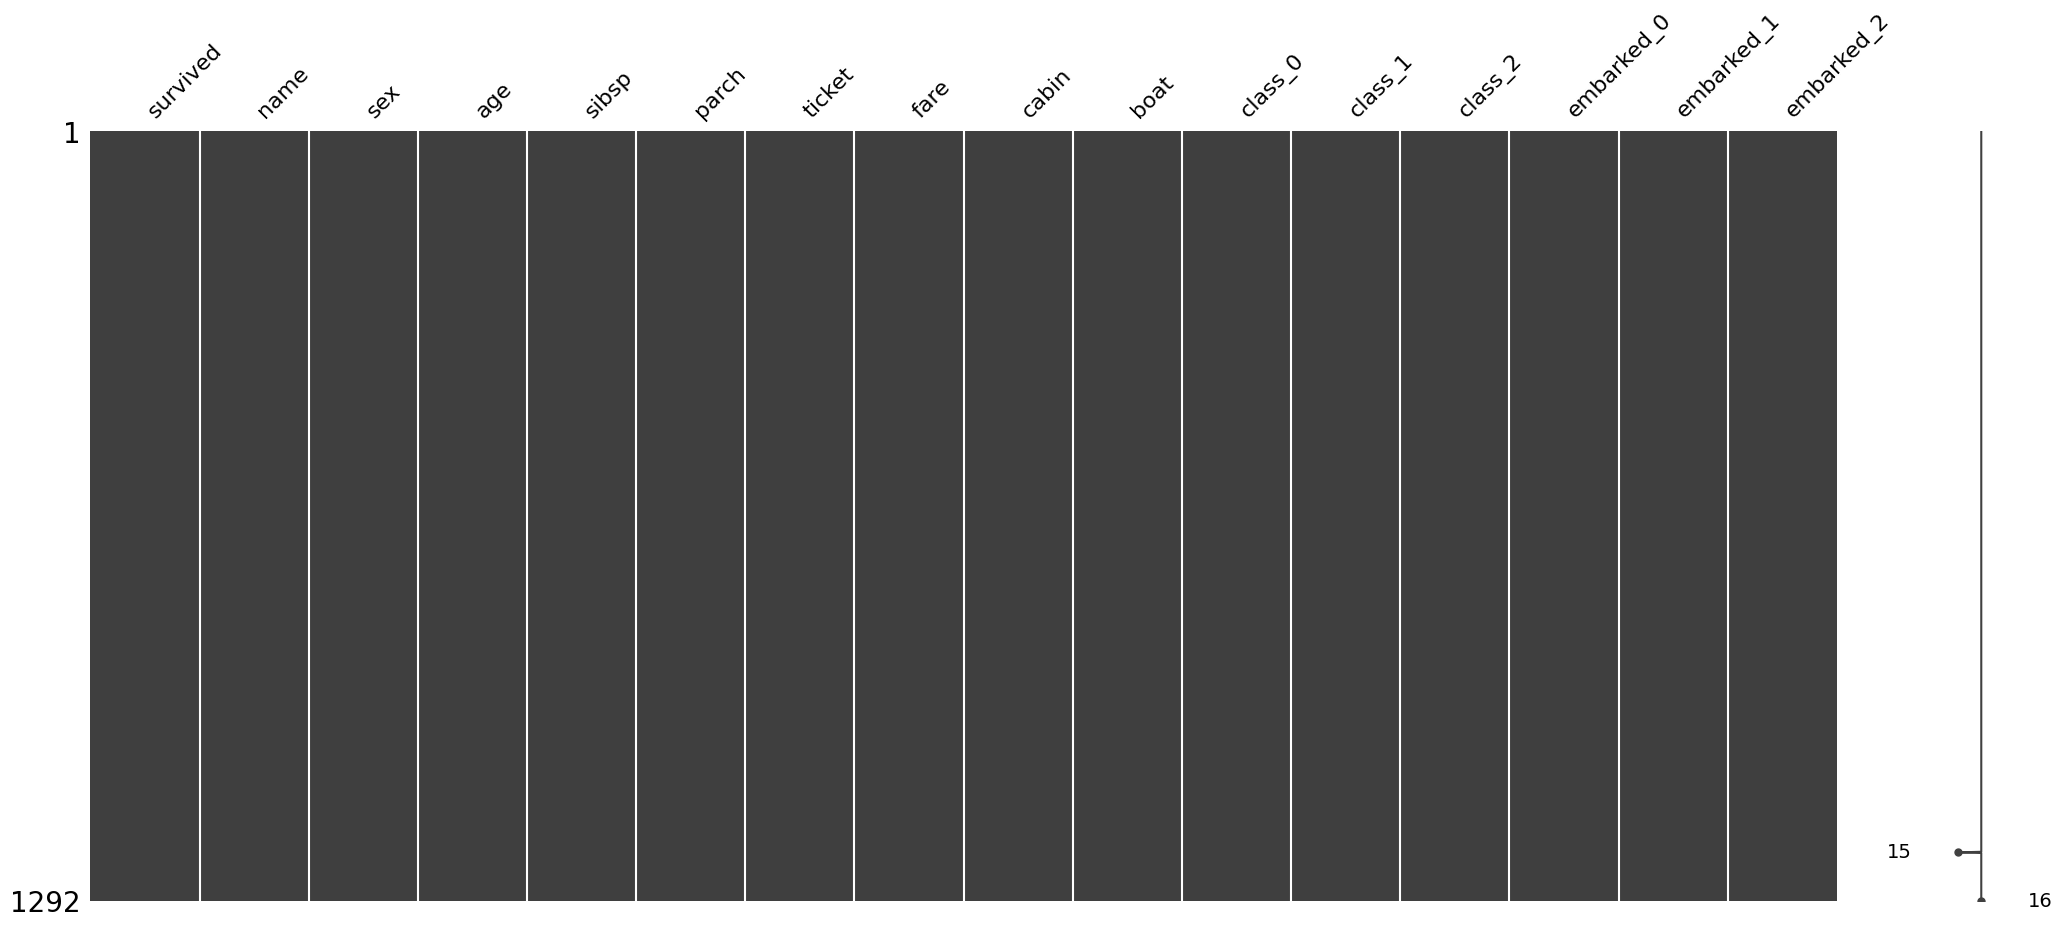

In [52]:
msno.matrix(df)
plt.show()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292 entries, 0 to 1291
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    1292 non-null   int64  
 1   name        1292 non-null   object 
 2   sex         1292 non-null   int64  
 3   age         1292 non-null   float64
 4   sibsp       1292 non-null   int64  
 5   parch       1292 non-null   int64  
 6   ticket      1292 non-null   int64  
 7   fare        1291 non-null   float64
 8   cabin       1292 non-null   int64  
 9   boat        1292 non-null   int64  
 10  class_0     1292 non-null   float64
 11  class_1     1292 non-null   float64
 12  class_2     1292 non-null   float64
 13  embarked_0  1292 non-null   float64
 14  embarked_1  1292 non-null   float64
 15  embarked_2  1292 non-null   float64
dtypes: float64(8), int64(7), object(1)
memory usage: 161.6+ KB


# Tensorflow NN

In [54]:
sc = StandardScaler()

X = df.drop(columns = ['survived','name'], axis=1, inplace=False)
X = sc.fit_transform(X)
y = df['survived']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
titanic_model = keras.Sequential(
    [
        layers.Input(shape=(X.shape[1],)),
        layers.Dense(300, activation="relu", name="layer1"),
        layers.Dropout(0.2),
        layers.Dense(150, activation="relu", name="layer2"),
        layers.Dense(70, activation="relu", name="layer3"),
        layers.Dense(1,activation="sigmoid", name="output_l"),
    ]
)
titanic_model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 300)            │         4,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 150)            │        45,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 70)             │        10,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_l (Dense)                │ (None, 1)              │            71 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,291 (235.51 KB)

 Trainable params: 60,291 (235.51 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
titanic_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:

history = titanic_model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    batch_size=200, 
                    epochs=50)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6004 - loss: 0.6618 - val_accuracy: 0.5946 - val_loss: 0.6893
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6229 - loss: 0.6868 - val_accuracy: 0.5946 - val_loss: 0.6851
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6291 - loss: 0.6808 - val_accuracy: 0.5946 - val_loss: 0.6816
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6196 - loss: 0.6768 - val_accuracy: 0.5946 - val_loss: 0.6785
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6102 - loss: 0.6742 - val_accuracy: 0.5946 - val_loss: 0.6763
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6222 - loss: 0.6676 - val_accuracy: 0.5946 - val_loss: 0.6752
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6180 - loss: 0.6664 - val_accuracy: 0.5946 - val_loss: 0.6754
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6233 - loss: 0.6630 - val_accuracy: 0.5946 - val_loss: 0.6762
Epoch 9

# Values are way below the good results.. I think that I have done some bad preprocassing, thus the outcome of NN is not good